### Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
import seaborn as sns
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.index = df.index + 1

In [4]:
df.head()

,sbd,tên,dd,mm,yyyy,toán,ngữ văn,khxh,khtn,lịch sử,địa lí,gdcd,sinh học,vật lí,hóa học,tiếng anh
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2


In [5]:
# rename columns from Vietnamese to English
df = df.rename(columns={"sbd":"id", "tên":"full name", "toán":"math", "ngữ văn":"literature", "khxh":"social science", 
                        "khtn":"natural science", "lịch sử":"history", "địa lí":"geography", "gdcd":"civics", 
                        "sinh học":"biology", "vật lí":"physics", "hóa học":"chemistry", "tiếng anh":"english"})

In [6]:
df.head()

,id,full name,dd,mm,yyyy,math,literature,social science,natural science,history,geography,civics,biology,physics,chemistry,english
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2


## Find the number of students taking and not taking each exam

In [7]:
df.columns

Index(['id', 'full name', 'dd', 'mm', 'yyyy', 'math', 'literature',
       'social science', 'natural science', 'history', 'geography', 'civics',
       'biology', 'physics', 'chemistry', 'english'],
      dtype='object')

In [8]:
count = np.array([len(df[df[x] != -1.0]) for x in df.columns[5:]])

In [9]:
count

array([74179, 72642, 25221, 41948, 30313, 29597, 25091, 42595, 42853,
       43088, 65735])

In [10]:
df.columns[5:]

Index(['math', 'literature', 'social science', 'natural science', 'history',
       'geography', 'civics', 'biology', 'physics', 'chemistry', 'english'],
      dtype='object')

In [11]:
presence = pd.DataFrame(count,index=df.columns[5:],columns=['Number of students'])

In [12]:
presence

,Number of students
math,74179
literature,72642
social science,25221
natural science,41948
history,30313
geography,29597
civics,25091
biology,42595
physics,42853
chemistry,43088


<AxesSubplot:title={'center':'The numbers of student participating in each exam'}, xlabel='Subject', ylabel='Number of students'>

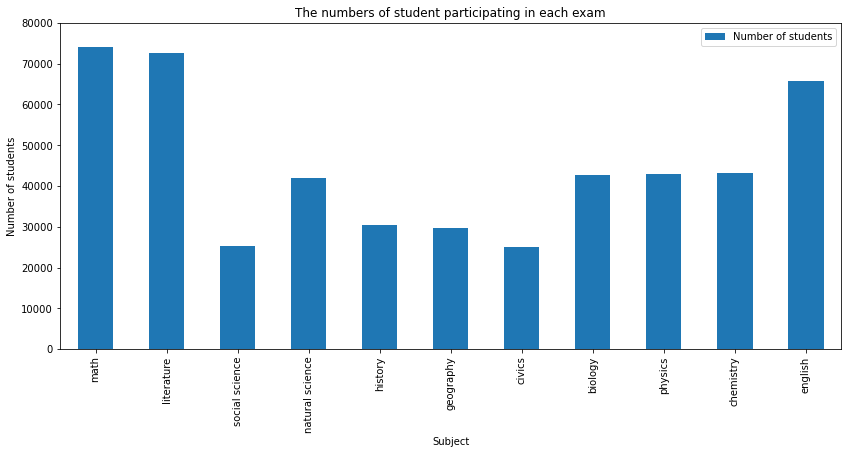

In [13]:
presence.plot(kind='bar',figsize=(14,6),use_index=True,
              xlabel='Subject',ylabel='Number of students',title='The numbers of student participating in each exam',
              ylim=(0,80000))

In [14]:
absence = pd.DataFrame(len(df) - count,index=df.columns[5:],columns=['Number of students'])

In [15]:
absence

,Number of students
math,265
literature,1802
social science,49223
natural science,32496
history,44131
geography,44847
civics,49353
biology,31849
physics,31591
chemistry,31356


<AxesSubplot:title={'center':'The numbers of student who did not take for sign up for each exam'}, xlabel='Subject', ylabel='Number of students'>

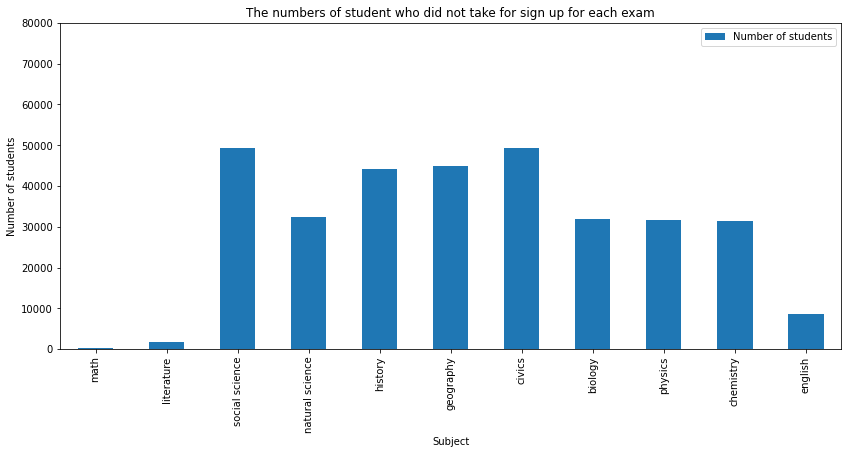

In [16]:
absence.plot(kind='bar',figsize=(14,6),use_index=True,
              xlabel='Subject',ylabel='Number of students',
             title='The numbers of student who did not take for sign up for each exam',
              ylim=(0,80000))

## Find the percentage of students taking each exam combination

In [17]:
combination = np.array([0 for x in range(12)])

In [18]:
combination

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
for j in range(len(df)):
    count = 0
    for i in df.iloc[j]:
        if i == -1:
            count += 1
    combination[11 - count] += 1

In [20]:
combination

array([    0,    80,   122,  2598,  4334,   318,  2730, 64261,     0,
           0,     0,     1])

In [21]:
sum(combination)

74444

In [22]:
subject_combination = pd.DataFrame(combination,columns=['Number of students'])

In [23]:
subject_combination

,Number of students
0,0
1,80
2,122
3,2598
4,4334
5,318
6,2730
7,64261
8,0
9,0


In [24]:
labels = ['0 subject', '1 subject'] + [str(x) + ' subjects' for x in range(2,12)]

In [25]:
labels

['0 subject',
 '1 subject',
 '2 subjects',
 '3 subjects',
 '4 subjects',
 '5 subjects',
 '6 subjects',
 '7 subjects',
 '8 subjects',
 '9 subjects',
 '10 subjects',
 '11 subjects']

In [26]:
combination

array([    0,    80,   122,  2598,  4334,   318,  2730, 64261,     0,
           0,     0,     1])

In [27]:
combination_for_plotting = []
count = 0
for i in range(len(combination)):
    if combination[i] > 2000:
        combination_for_plotting.append(combination[i])
    elif i in [0,1]:
        labels.remove("{} subject".format(i))
        count += combination[i]
    else:
        labels.remove("{} subjects".format(i))
        count += combination[i]
        
combination_for_plotting.append(count)
labels.append('Others')
combination_for_plotting

[2598, 4334, 2730, 64261, 521]

In [28]:
labels

['3 subjects', '4 subjects', '6 subjects', '7 subjects', 'Others']

In [29]:
combination_for_plotting_df = pd.DataFrame(data=combination_for_plotting,index=labels,columns=['Number of students'])

In [30]:
combination_for_plotting_df

,Number of students
3 subjects,2598
4 subjects,4334
6 subjects,2730
7 subjects,64261
Others,521


Text(0.5, 1.35, 'Percentage of  by students')

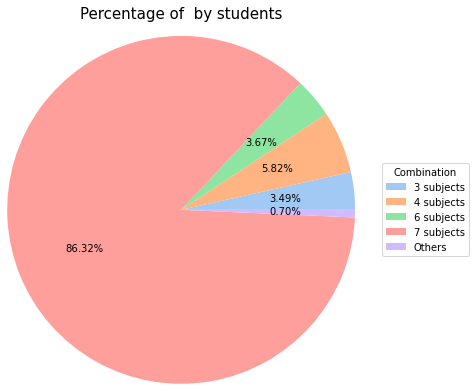

In [31]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(combination_for_plotting, colors = colors, autopct='%.2f%%',radius=2)
plt.legend(title = "Combination", loc='center left', labels=labels, bbox_to_anchor=(1.4, 0.5))

plt.title('Percentage of  by students',loc='center',y=1.35,fontsize=15)

## Evaluate general performance

In [32]:
mean = []
for j in range(len(df)):
    count = 0
    sum = 0
    for i in df.iloc[j][5:]:
        if i != -1:
            count += 1
            sum += i
     
    mean.append(round(sum/count,2))

In [35]:
mean = np.array(mean)

In [36]:
df['mean'] = mean

In [37]:
df.head()

,id,full name,dd,mm,yyyy,math,literature,social science,natural science,history,geography,civics,biology,physics,chemistry,english,mean
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2,6.39
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0,7.61
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0,6.75
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6,6.38
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2,6.54


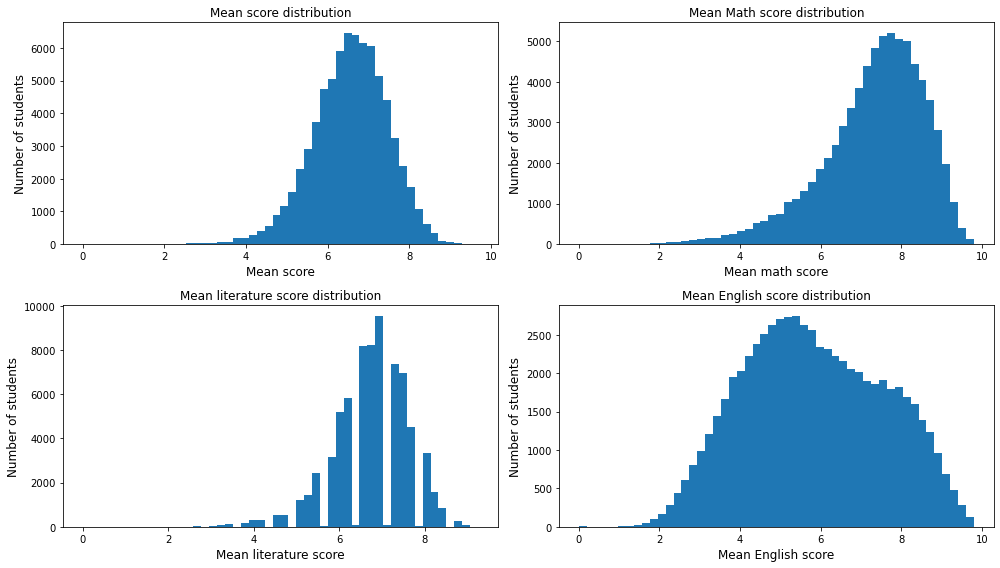

In [38]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(14,8))

axes[0,0].hist(df['mean'],bins=50)
axes[0,0].set_xlabel('Mean score', fontsize = 12)
axes[0,0].set_ylabel('Number of students', fontsize = 12)
axes[0,0].set_title('Mean score distribution', fontsize = 12)

axes[0,1].hist(df[df['math'] != -1]['math'],bins=50)
axes[0,1].set_xlabel('Mean math score', fontsize = 12)
axes[0,1].set_ylabel('Number of students', fontsize = 12)
axes[0,1].set_title('Mean Math score distribution', fontsize = 12)

axes[1,0].hist(df[df['literature'] != -1]['literature'],bins=50)
axes[1,0].set_xlabel('Mean literature score', fontsize = 12)
axes[1,0].set_ylabel('Number of students', fontsize = 12)
axes[1,0].set_title('Mean literature score distribution', fontsize = 12)

axes[1,1].hist(df[df['english'] != -1]['english'],bins=50)
axes[1,1].set_xlabel('Mean English score', fontsize = 12)
axes[1,1].set_ylabel('Number of students', fontsize = 12)
axes[1,1].set_title('Mean English score distribution', fontsize = 12)

plt.tight_layout()

## 

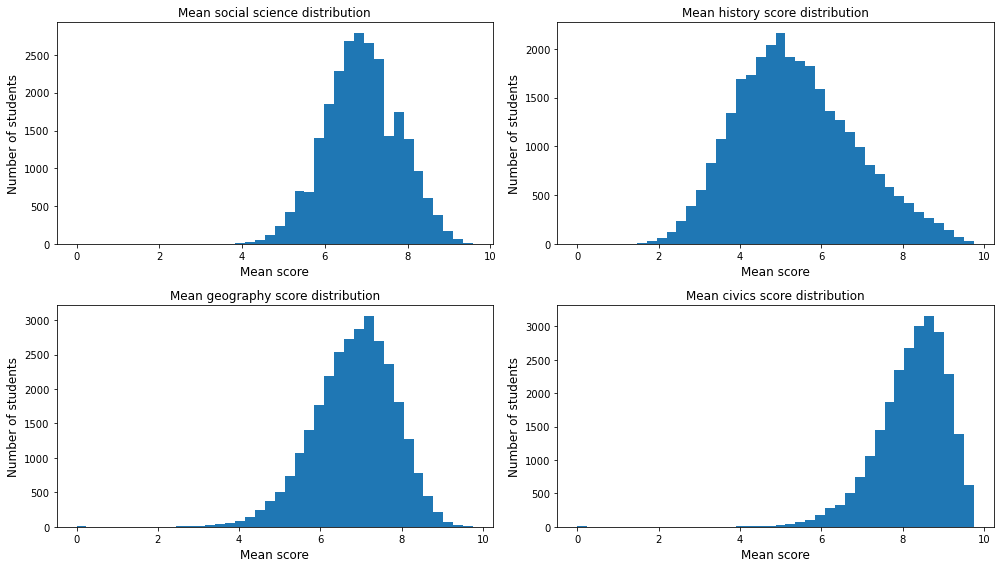

In [39]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(14,8))

axes[0,0].hist(df[df['social science'] != -1]['social science'],bins=40)
axes[0,0].set_xlabel('Mean score', fontsize = 12)
axes[0,0].set_ylabel('Number of students', fontsize = 12)
axes[0,0].set_title('Mean social science distribution', fontsize = 12)

axes[0,1].hist(df[df['history'] != -1]['history'],bins=40)
axes[0,1].set_xlabel('Mean score', fontsize = 12)
axes[0,1].set_ylabel('Number of students', fontsize = 12)
axes[0,1].set_title('Mean history score distribution', fontsize = 12)

axes[1,0].hist(df[df['geography'] != -1]['geography'],bins=40)
axes[1,0].set_xlabel('Mean score', fontsize = 12)
axes[1,0].set_ylabel('Number of students', fontsize = 12)
axes[1,0].set_title('Mean geography score distribution', fontsize = 12)

axes[1,1].hist(df[df['civics'] != -1]['civics'],bins=40)
axes[1,1].set_xlabel('Mean score', fontsize = 12)
axes[1,1].set_ylabel('Number of students', fontsize = 12)
axes[1,1].set_title('Mean civics score distribution', fontsize = 12)

plt.tight_layout()

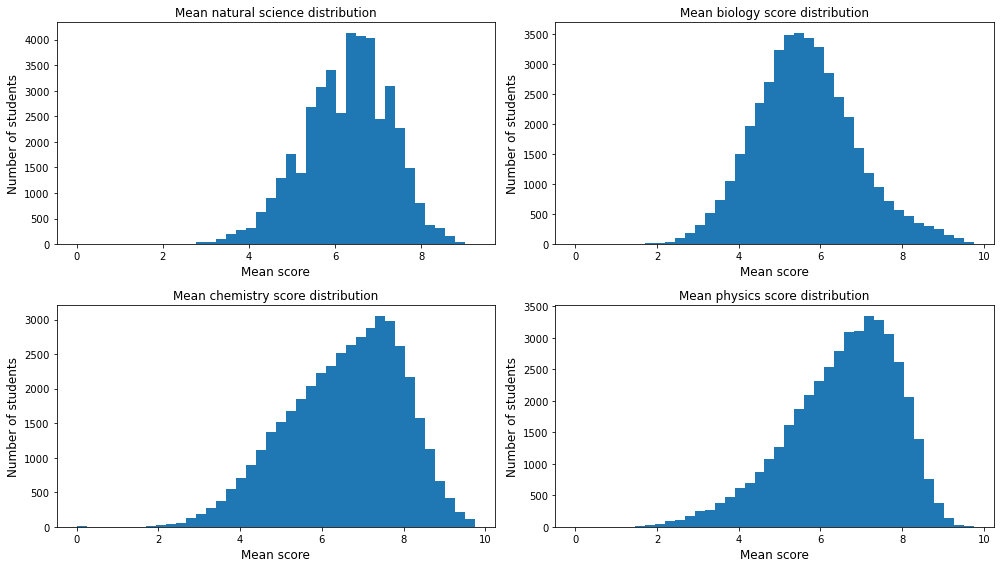

In [40]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(14,8))

axes[0,0].hist(df[df['natural science'] != -1]['natural science'],bins=40)
axes[0,0].set_xlabel('Mean score', fontsize = 12)
axes[0,0].set_ylabel('Number of students', fontsize = 12)
axes[0,0].set_title('Mean natural science distribution', fontsize = 12)

axes[0,1].hist(df[df['biology'] != -1]['biology'],bins=40)
axes[0,1].set_xlabel('Mean score', fontsize = 12)
axes[0,1].set_ylabel('Number of students', fontsize = 12)
axes[0,1].set_title('Mean biology score distribution', fontsize = 12)

axes[1,0].hist(df[df['chemistry'] != -1]['chemistry'],bins=40)
axes[1,0].set_xlabel('Mean score', fontsize = 12)
axes[1,0].set_ylabel('Number of students', fontsize = 12)
axes[1,0].set_title('Mean chemistry score distribution', fontsize = 12)

axes[1,1].hist(df[df['physics'] != -1]['physics'],bins=40)
axes[1,1].set_xlabel('Mean score', fontsize = 12)
axes[1,1].set_ylabel('Number of students', fontsize = 12)
axes[1,1].set_title('Mean physics score distribution', fontsize = 12)

plt.tight_layout()

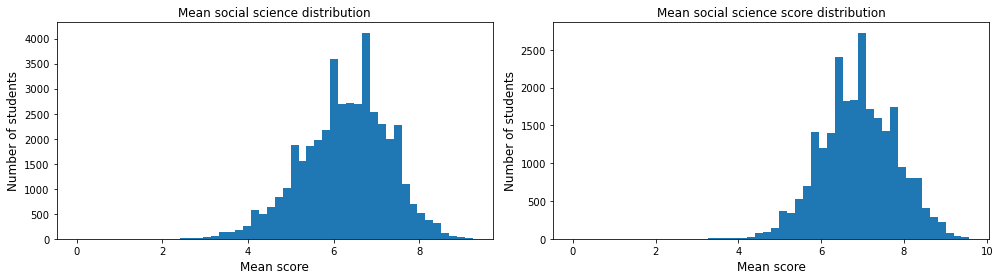

In [41]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

axes[0].hist(df[df['natural science'] != -1]['natural science'],bins=50)
axes[0].set_xlabel('Mean score', fontsize = 12)
axes[0].set_ylabel('Number of students', fontsize = 12)
axes[0].set_title('Mean social science distribution', fontsize = 12)

axes[1].hist(df[df['social science'] != -1]['social science'],bins=50)
axes[1].set_xlabel('Mean score', fontsize = 12)
axes[1].set_ylabel('Number of students', fontsize = 12)
axes[1].set_title('Mean social science score distribution', fontsize = 12)

plt.tight_layout()

In [42]:
df.head()

,id,full name,dd,mm,yyyy,math,literature,social science,natural science,history,geography,civics,biology,physics,chemistry,english,mean
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2,6.39
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0,7.61
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0,6.75
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6,6.38
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2,6.54


Text(0.5, 1.02, 'Relationship between age and performance')

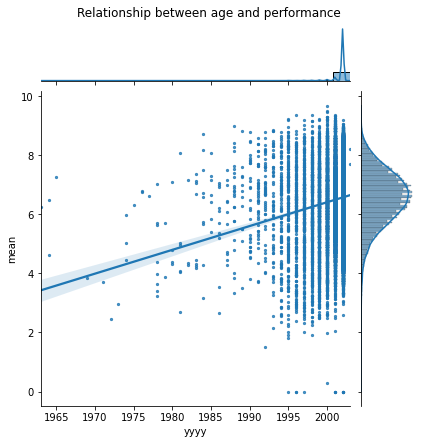

In [43]:
sns.jointplot(x="yyyy", y="mean", data=df,kind='reg',scatter_kws={'s':5})
plt.suptitle("Relationship between age and performance",y=1.02,fontsize=12)

## Create wordclouds to find the most popular first/last name

In [73]:
last_name = []
for i in range(len(df)):
    last_name.append(df['full name'][i+1].split()[0])

(-0.5, 399.5, 199.5, -0.5)

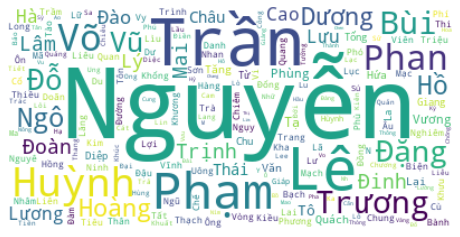

In [82]:
#Importing Libraries
from wordcloud import WordCloud

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(last_name))

# Display the generated Word Cloud
plt.figure( figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

In [91]:
first_name = []
for i in range(len(df)):
    first_name.append(df['full name'][i+1].split()[-1])

(-0.5, 399.5, 199.5, -0.5)

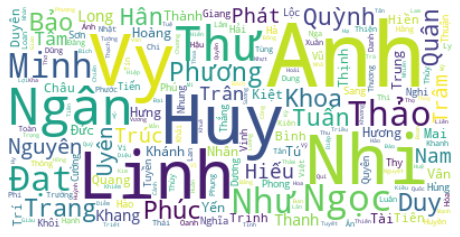

In [93]:
#Importing Libraries
from wordcloud import WordCloud

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(first_name))

# Display the generated Word Cloud
plt.figure( figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")